In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy
import csv
import os
import numpy as np

%matplotlib inline
sns.set()

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
cwd = os.getcwd()
print (cwd)
print (os.listdir(cwd))

C:\Users\abels\Desktop\spotify_scrape
['.git', '.gitignore', '.ipynb_checkpoints', 'API_KEYS.txt', 'Capstone1_Analysis_of_top_200_Spotify.pdf', 'Data', 'README.md', 'song_analysis_graphs.ipynb', 'Song_Progression_Analysis.ipynb', 'top_200_stream_numbers.ipynb', '__pycache__']


In [4]:
csv_path = cwd + '\\Data\\final_csv_files\\'
df = pd.read_csv(csv_path + 'song_analysis_data.csv')
stream_numbers = pd.read_csv(csv_path + 'Combined_Top_200_Stream_Numbers.csv')

In [5]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.681,0.594,7,-7.028,1,0.2820,0.16500,0.000003,0.134,0.535,186.054,audio_features,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,https://api.spotify.com/v1/tracks/5aAx2yezTd8z...,https://api.spotify.com/v1/audio-analysis/5aAx...,230453,4
1,0.748,0.524,8,-5.599,1,0.0338,0.41400,0.000000,0.111,0.661,95.010,audio_features,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,https://api.spotify.com/v1/audio-analysis/7BKL...,244960,4
2,0.476,0.718,8,-5.309,1,0.0576,0.07840,0.000010,0.122,0.142,199.864,audio_features,4pdPtRcBmOSQDlJ3Fk945m,spotify:track:4pdPtRcBmOSQDlJ3Fk945m,https://api.spotify.com/v1/tracks/4pdPtRcBmOSQ...,https://api.spotify.com/v1/audio-analysis/4pdP...,205947,4
3,0.720,0.763,9,-4.068,0,0.0523,0.40600,0.000000,0.180,0.742,101.965,audio_features,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,https://api.spotify.com/v1/audio-analysis/5knu...,251088,4
4,0.791,0.619,1,-5.886,1,0.0532,0.00784,0.004230,0.351,0.371,103.989,audio_features,1xznGGDReH1oQq0xzbwXa3,spotify:track:1xznGGDReH1oQq0xzbwXa3,https://api.spotify.com/v1/tracks/1xznGGDReH1o...,https://api.spotify.com/v1/audio-analysis/1xzn...,173987,4


In [6]:
stream_numbers.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Date
0,1,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01
1,2,2,Closer,The Chainsmokers,3015525.0,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01
2,3,3,Let Me Love You,DJ Snake,2545384.0,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01
3,4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01
4,5,5,One Dance,Drake,2259887.0,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01


In [7]:
df = df.set_index('id')

In [8]:
df = df.drop(['uri', 'track_href', 'analysis_url', 'type'], axis=1)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,
5aAx2yezTd8zXrkmtKl66Z,0.681,0.594,7,-7.028,1,0.2820,0.16500,0.000003,0.134,0.535,186.054,230453,4
7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,8,-5.599,1,0.0338,0.41400,0.000000,0.111,0.661,95.010,244960,4
4pdPtRcBmOSQDlJ3Fk945m,0.476,0.718,8,-5.309,1,0.0576,0.07840,0.000010,0.122,0.142,199.864,205947,4
5knuzwU65gJK7IF5yJsuaW,0.720,0.763,9,-4.068,0,0.0523,0.40600,0.000000,0.180,0.742,101.965,251088,4
1xznGGDReH1oQq0xzbwXa3,0.791,0.619,1,-5.886,1,0.0532,0.00784,0.004230,0.351,0.371,103.989,173987,4


In [9]:
stream_numbers['ids'] = stream_numbers['URL'].str[31:100]
stream_numbers.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Date,ids
0,1,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01,5aAx2yezTd8zXrkmtKl66Z
1,2,2,Closer,The Chainsmokers,3015525.0,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01,7BKLCZ1jbUBVqRi2FVlTVw
2,3,3,Let Me Love You,DJ Snake,2545384.0,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01,4pdPtRcBmOSQDlJ3Fk945m
3,4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,5knuzwU65gJK7IF5yJsuaW
4,5,5,One Dance,Drake,2259887.0,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01,1xznGGDReH1oQq0xzbwXa3


In [10]:
total_streams_by_ids = stream_numbers.groupby('ids').sum()['Streams']
print (total_streams_by_ids.head())

ids
000xQL6tZNLJzIrtIgxqSl    104141294.0
003eoIwxETJujVWmNFMoZy      9809956.0
00B7TZ0Xawar6NZ00JFomN     11882167.0
00EPIEnX1JFjff8sC6bccd     99336818.0
00TVmX9spquyg0UKuN57l3       557997.0
Name: Streams, dtype: float64


In [11]:
df.shape

(3582, 13)

In [12]:
df = df.reset_index()

In [13]:
df = df.merge(total_streams_by_ids, how='inner', left_on='id', right_on='ids')

In [14]:
df.shape

(3582, 15)

In [15]:
df['streams_log'] = np.log(df['Streams'])

In [16]:
df.head()

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Streams,streams_log
0,5aAx2yezTd8zXrkmtKl66Z,0.681,0.594,7,-7.028,1,0.2820,0.16500,0.000003,0.134,0.535,186.054,230453,4,512657238.0,20.055118
1,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,8,-5.599,1,0.0338,0.41400,0.000000,0.111,0.661,95.010,244960,4,792056510.0,20.490143
2,4pdPtRcBmOSQDlJ3Fk945m,0.476,0.718,8,-5.309,1,0.0576,0.07840,0.000010,0.122,0.142,199.864,205947,4,316340395.0,19.572329
3,5knuzwU65gJK7IF5yJsuaW,0.720,0.763,9,-4.068,0,0.0523,0.40600,0.000000,0.180,0.742,101.965,251088,4,509559892.0,20.049058
4,1xznGGDReH1oQq0xzbwXa3,0.791,0.619,1,-5.886,1,0.0532,0.00784,0.004230,0.351,0.371,103.989,173987,4,466141981.0,19.960001


In [17]:
print (df['streams_log'].min())
print (df['streams_log'].max())

12.694502342303187
21.460560776177033


In [18]:
def plot_hist(df_header):
    _ = plt.hist(df[df_header], bins=30)
    _ = plt.xlabel(df_header)
    _ = plt.ylabel('# of songs')
    plt.show()
    

In [19]:
key_mapping = {0:'C,B♯)', 1:'C♯,D♭',2:'D',3:'D♯,E♭',4:'E',5:'F',6:'F♯,G♭',7:'G',8:'G♯,A♭',9:'A',10:'A♯,B♭',11:'B',-1:'Unknown'}

In [20]:
df['key'] = df['key'].map(key_mapping)

In [21]:
df['mode'] = df['mode'].map({0:'minor', 1:'major'})

---
## Graphs of features
---

In [22]:
asdf = np.array([1,2,3,4,5,6,7,8,9,11,12])
np.percentile(asdf,[5,95])[0]

1.5

In [23]:
def pctile(data, prt=[5,95]):
    adj_data = data[(data > np.percentile(data,prt)[0]) & (data < np.percentile(data,prt)[1])]
    return adj_data

In [24]:
df.columns

Index(['id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'Streams',
       'streams_log'],
      dtype='object')

In [25]:
print ('Total sample size is %i' %len(df))

Total sample size is 3582


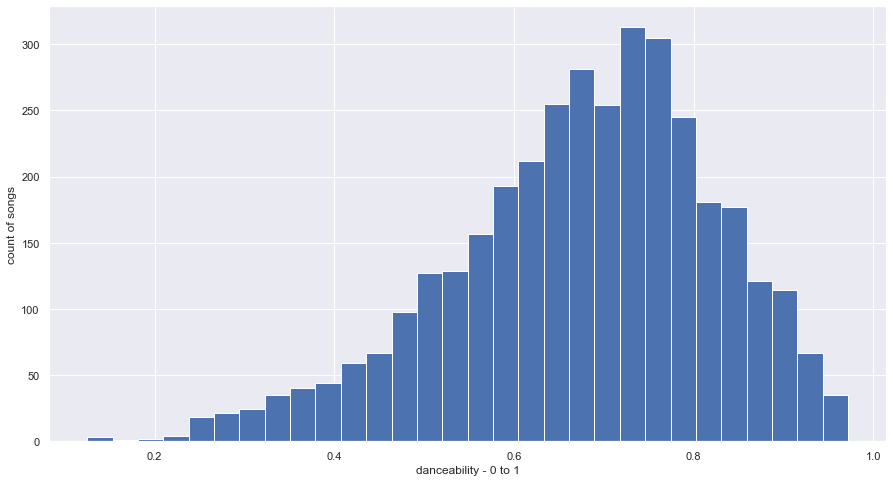

In [26]:
_ = plt.figure(figsize=(15,8))
_ = plt.hist(df['danceability'], bins=30)
_ = plt.xlabel('danceability - 0 to 1')
_ = plt.ylabel('count of songs')
plt.show()

#### __Danceability :__ Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

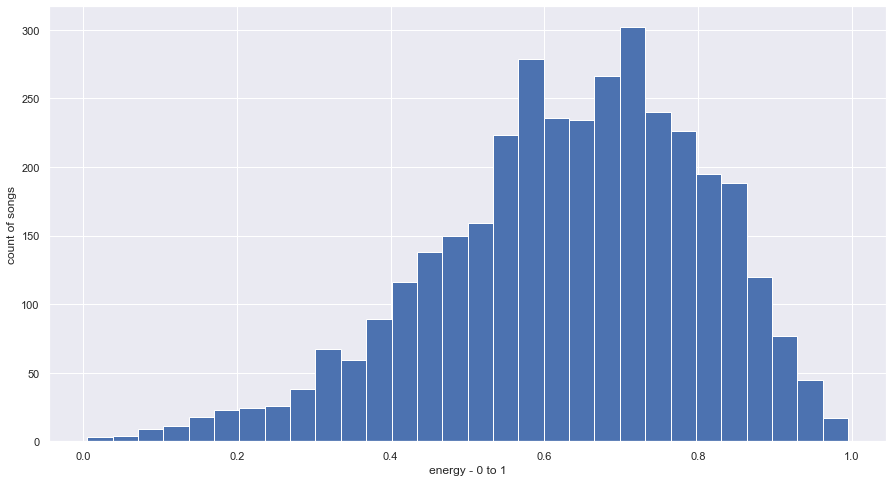

In [27]:
_ = plt.figure(figsize=(15,8))
_ = plt.hist(df['energy'], bins=30)
_ = plt.xlabel('energy - 0 to 1')
_ = plt.ylabel('count of songs')
plt.show()

#### Energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

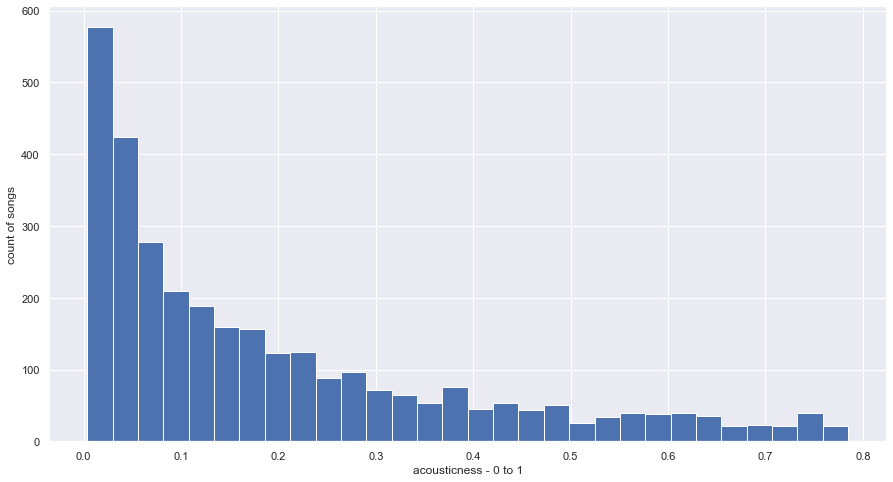

In [28]:
_ = plt.figure(figsize=(15,8))
_ = plt.hist(pctile(df['acousticness']), bins=30)
_ = plt.xlabel('acousticness - 0 to 1')
_ = plt.ylabel('count of songs')
plt.show()

#### Acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:

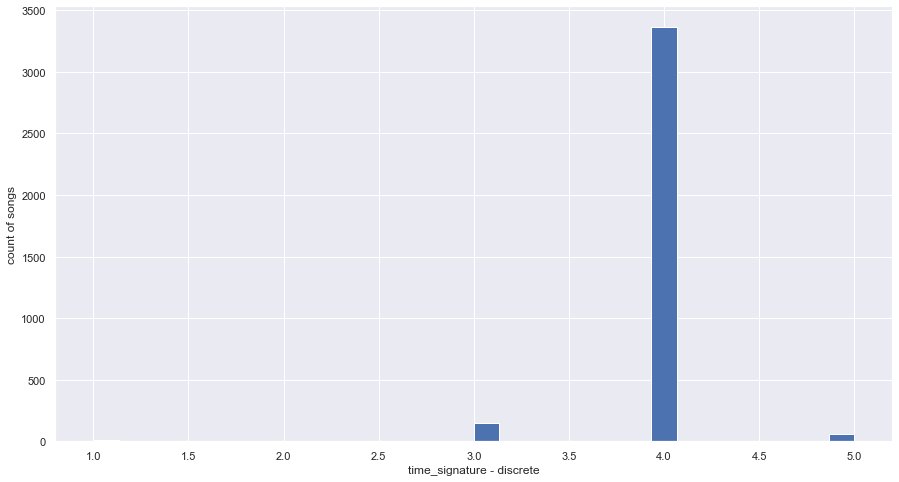

In [29]:
_ = plt.figure(figsize=(15,8))
_ = plt.hist(df['time_signature'], bins=30)
_ = plt.xlabel('time_signature - discrete')
_ = plt.ylabel('count of songs')
plt.show()

#### Time_signature -An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

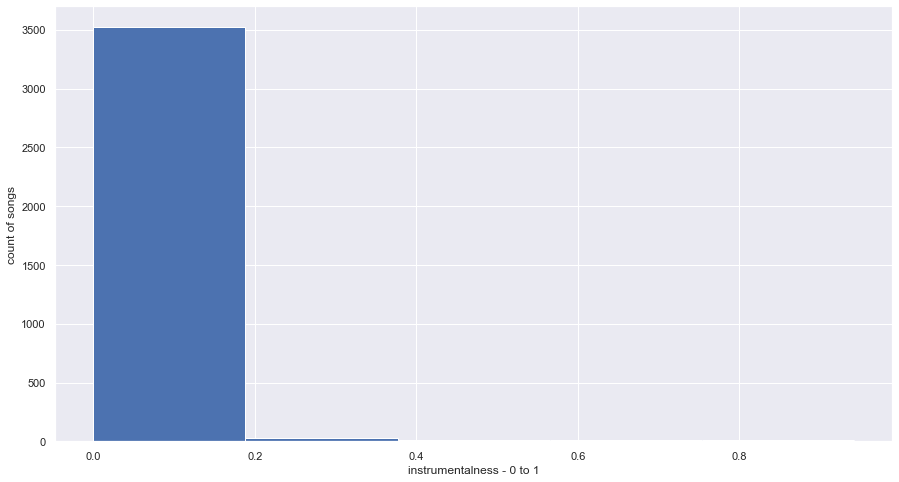

In [30]:
_ = plt.figure(figsize=(15,8))
_ = plt.hist(df['instrumentalness'], bins=5)
_ = plt.xlabel('instrumentalness - 0 to 1')
_ = plt.ylabel('count of songs')
plt.show()

#### Instrumentalness - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

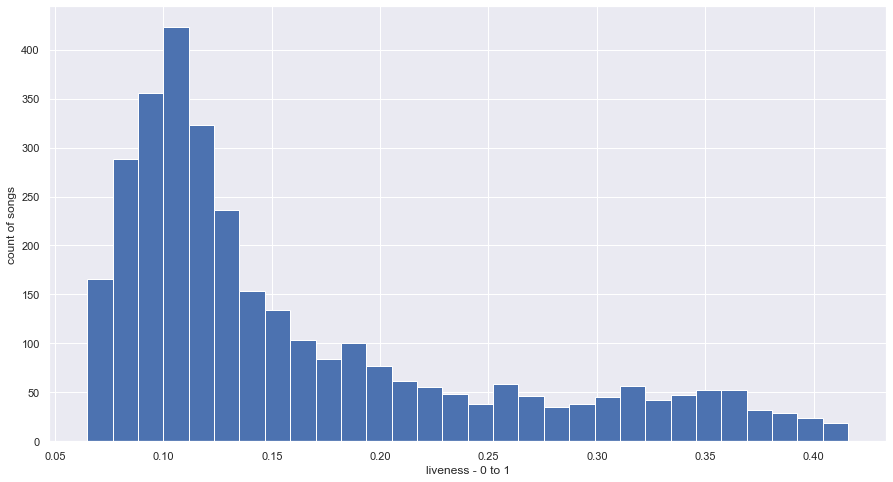

In [31]:
_ = plt.figure(figsize=(15,8))
_ = plt.hist(pctile(df['liveness']), bins=30)
_ = plt.xlabel('liveness - 0 to 1')
_ = plt.ylabel('count of songs')
plt.show()

#### Liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

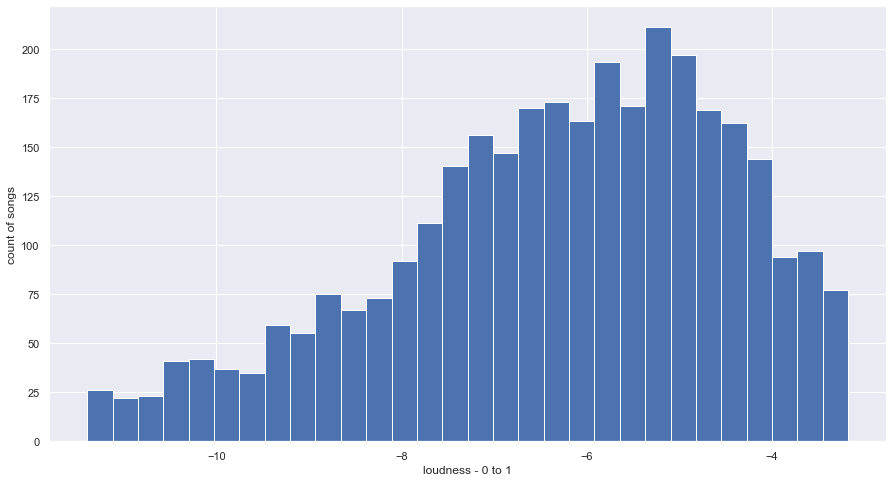

In [32]:
_ = plt.figure(figsize=(15,8))
_ = plt.hist(pctile(df['loudness']), bins=30)
_ = plt.xlabel('loudness - 0 to 1')
_ = plt.ylabel('count of songs')
plt.show()

#### Loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

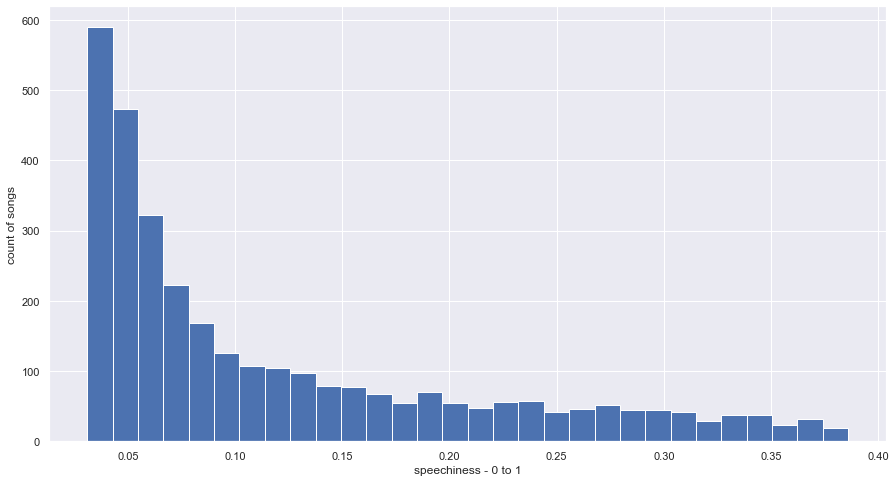

In [33]:
_ = plt.figure(figsize=(15,8))
_ = plt.hist(pctile(df['speechiness']), bins=30)
_ = plt.xlabel('speechiness - 0 to 1')
_ = plt.ylabel('count of songs')
plt.show()

#### Speechiness - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

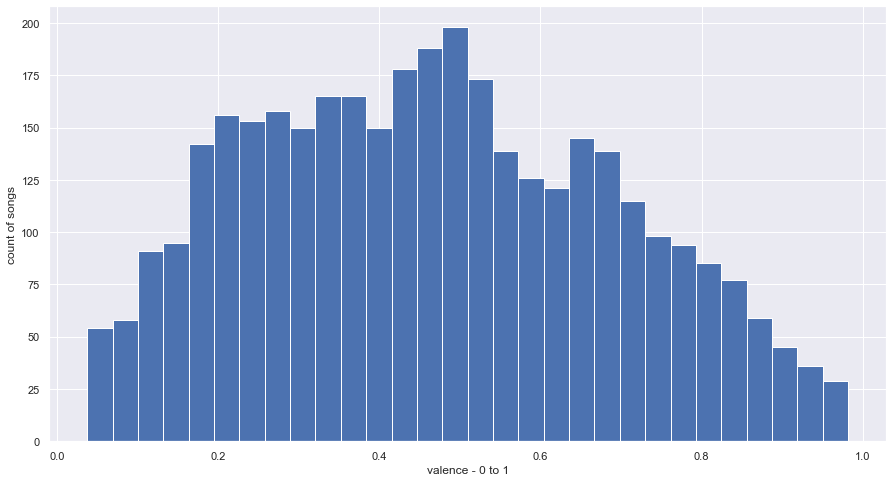

In [34]:
_ = plt.figure(figsize=(15,8))
_ = plt.hist(df['valence'], bins=30)
_ = plt.xlabel('valence - 0 to 1')
_ = plt.ylabel('count of songs')
plt.show()

#### A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

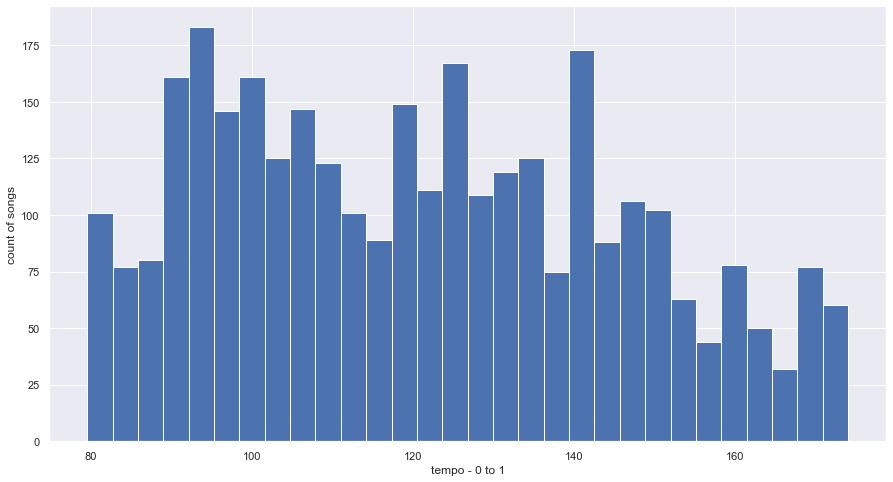

In [35]:
_ = plt.figure(figsize=(15,8))
_ = plt.hist(pctile(df['tempo']), bins=30)
_ = plt.xlabel('tempo - 0 to 1')
_ = plt.ylabel('count of songs')
plt.show()

#### Tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

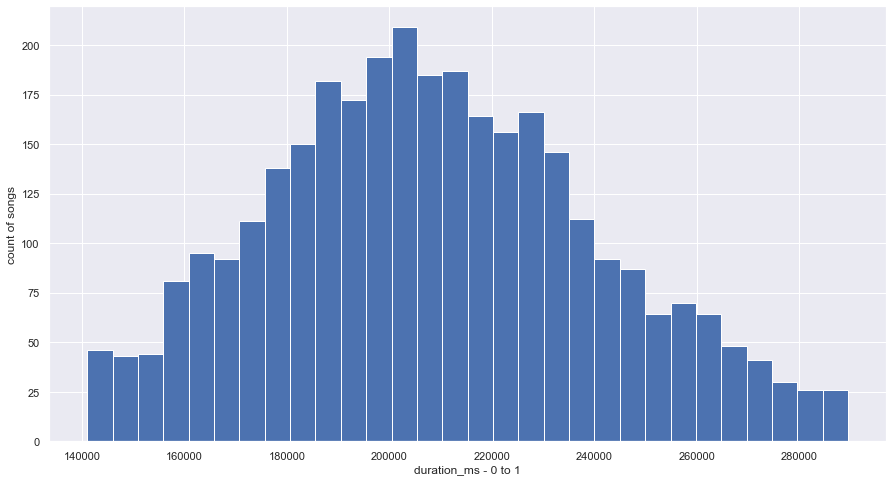

In [36]:
_ = plt.figure(figsize=(15,8))
_ = plt.hist(pctile(df['duration_ms']), bins=30)
_ = plt.xlabel('duration_ms - 0 to 1')
_ = plt.ylabel('count of songs')
plt.show()

#### duration_ms - The duration of the track in milliseconds.

C:\Users\abels\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\abels\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9837 missing from current font.
  font.set_text(s, 0, flags=flags)


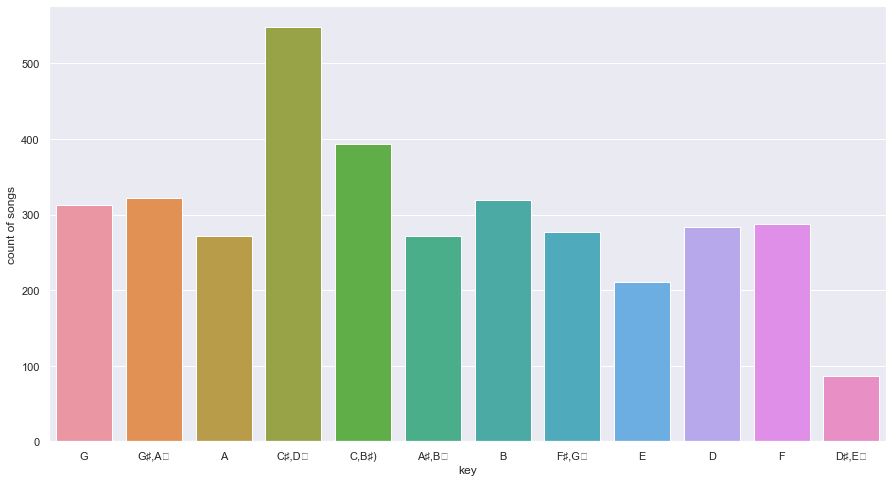

In [37]:
_ = plt.figure(figsize=(15,8))
_ = sns.countplot(x="key", data=df)
_ = plt.xlabel('key')
_ = plt.ylabel('count of songs')
plt.show()

#### Key - The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

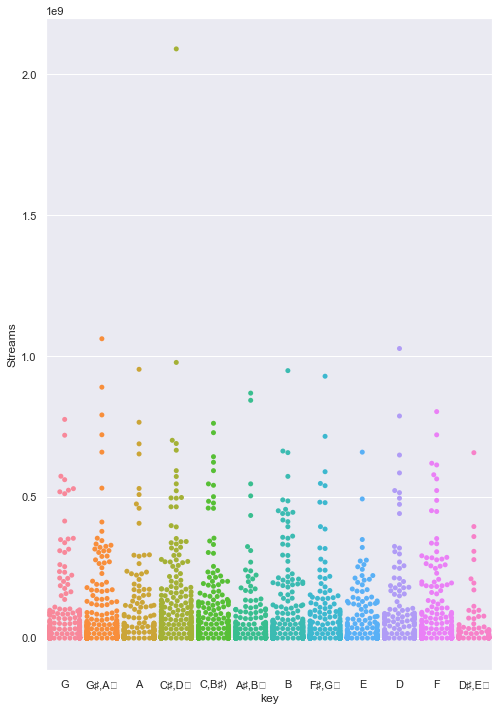

In [38]:
_ = plt.figure(figsize=(8,12))
ax = sns.swarmplot(x="key", y="Streams", data=df)
plt.show()

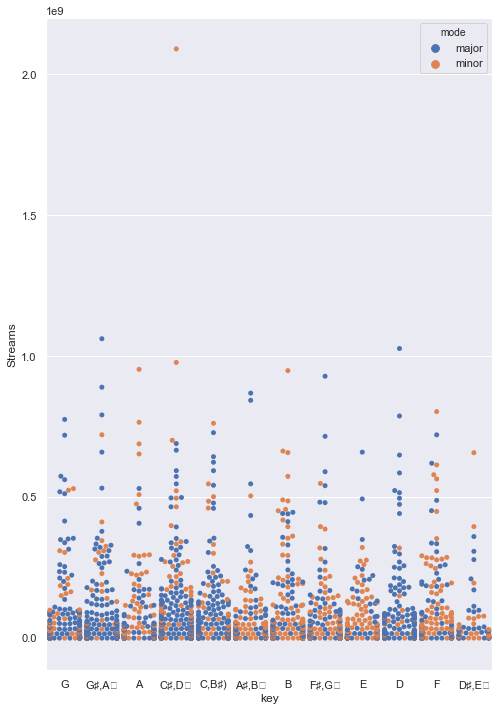

In [39]:
_ = plt.figure(figsize=(8,12))
ax = sns.swarmplot(x="key", y="Streams", hue='mode', data=df)
plt.show()

In [40]:
df['Streams'].max()

2090273543.0

In [41]:
df.loc[df['Streams'].idxmax()]

id                  7qiZfU4dY1lWllzX7mPBI3
danceability                         0.825
energy                               0.652
key                                  C♯,D♭
loudness                            -3.183
mode                                 minor
speechiness                         0.0802
acousticness                         0.581
instrumentalness                         0
liveness                            0.0931
valence                              0.931
tempo                               95.977
duration_ms                         233713
time_signature                           4
Streams                        2.09027e+09
streams_log                        21.4606
Name: 232, dtype: object

C:\Users\abels\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9837 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 576x864 with 0 Axes>

C:\Users\abels\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9837 missing from current font.
  font.set_text(s, 0, flags=flags)


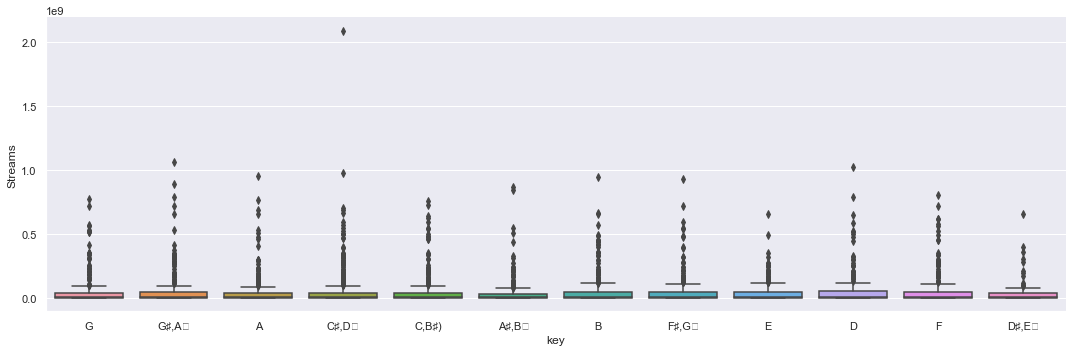

In [42]:
%matplotlib inline
_ = plt.figure(figsize=(8,12))
_ = sns.catplot(x="key", y="Streams", kind="box", data=df, aspect=3)
_ = plt.show()

C:\Users\abels\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9837 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 576x864 with 0 Axes>

C:\Users\abels\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9837 missing from current font.
  font.set_text(s, 0, flags=flags)


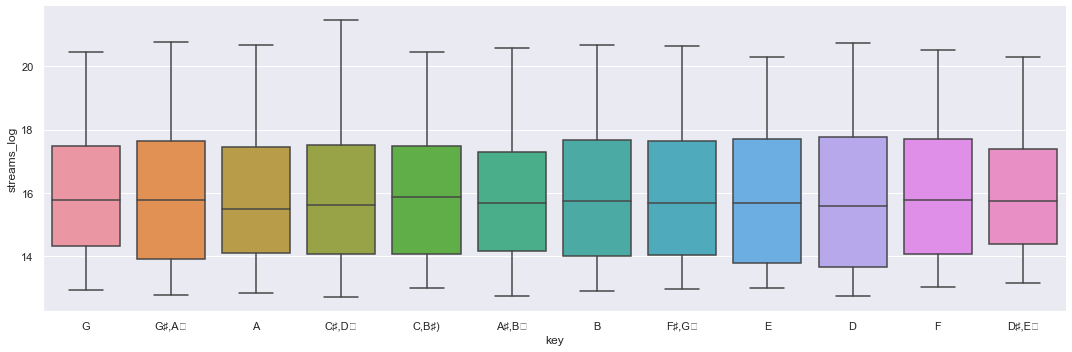

In [43]:
%matplotlib inline
_ = plt.figure(figsize=(8,12))
_ = sns.catplot(x="key", y="streams_log", kind="box", data=df, aspect=3)
_ = plt.show()

In [44]:
totalmode = 2103 + 1479

In [45]:
df['mode'].value_counts()

major    2103
minor    1479
Name: mode, dtype: int64

In [46]:
print(round((2109/totalmode*100),2))

58.88


In [47]:
totalmode = 2103 + 1479
print ('major key represent %f%% of the sample' %(round((2109/totalmode*100),3)))
print ('major key represent %f%% of the sample' %(round((1479/totalmode*100),3)))

major key represent 58.878000% of the sample
major key represent 41.290000% of the sample


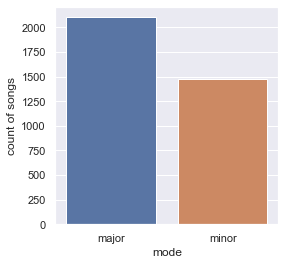

In [48]:
_ = plt.figure(figsize=(4,4))
_ = sns.countplot(x="mode", data=df)
_ = plt.xlabel('mode')
_ = plt.ylabel('count of songs')
#_ = plt.width(0.5)
plt.show()

In [49]:
df.columns

Index(['id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'Streams',
       'streams_log'],
      dtype='object')

In [50]:
corr_df = df.drop(['id'], axis=1)
corr = corr_df.corr()
print (corr)

                  danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000  0.095206  0.203735     0.205466     -0.263525   
energy                0.095206  1.000000  0.741898    -0.027657     -0.528572   
loudness              0.203735  0.741898  1.000000    -0.100756     -0.488643   
speechiness           0.205466 -0.027657 -0.100756     1.000000     -0.050650   
acousticness         -0.263525 -0.528572 -0.488643    -0.050650      1.000000   
instrumentalness     -0.092225 -0.049194 -0.123899    -0.053492      0.091042   
liveness             -0.094980  0.123097  0.026662     0.107390     -0.057821   
valence               0.261942  0.369000  0.255451    -0.004431     -0.070504   
tempo                -0.016967  0.096146  0.063589     0.124351     -0.095337   
duration_ms          -0.092734  0.091457  0.087743    -0.036317     -0.087362   
time_signature        0.188192  0.151990  0.134537     0.080491     -0.162340   
Streams               0.0843

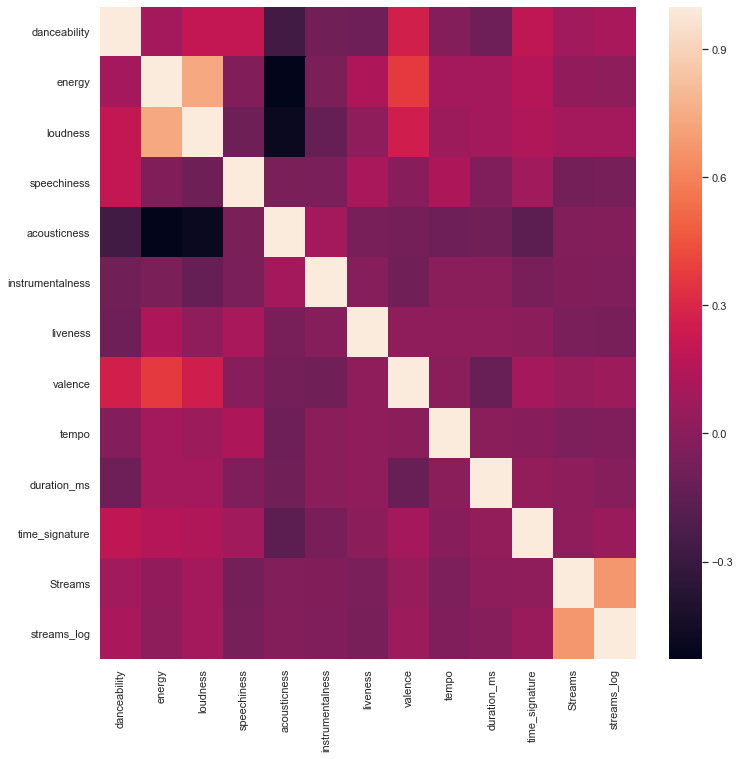

In [51]:
_ = plt.figure(figsize=(12,12))
sns.heatmap(corr)
plt.show()

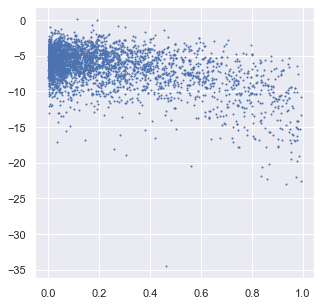

In [52]:
_ = plt.figure(figsize=(5,5))
_ = plt.scatter(df['acousticness'], df['loudness'], s=1)
_ = plt.xlabel=('asdf')
plt.show()

In [53]:
import matplotlib.pyplot as plt

danceability


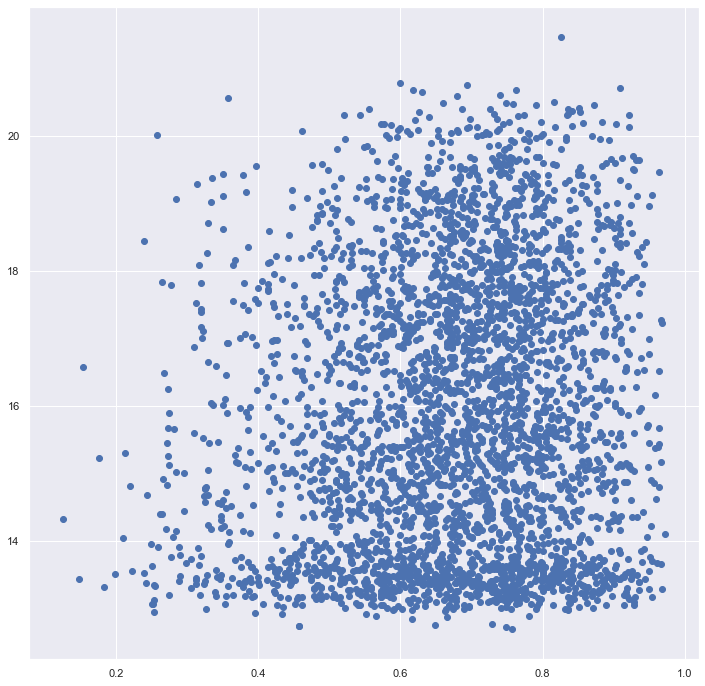

energy


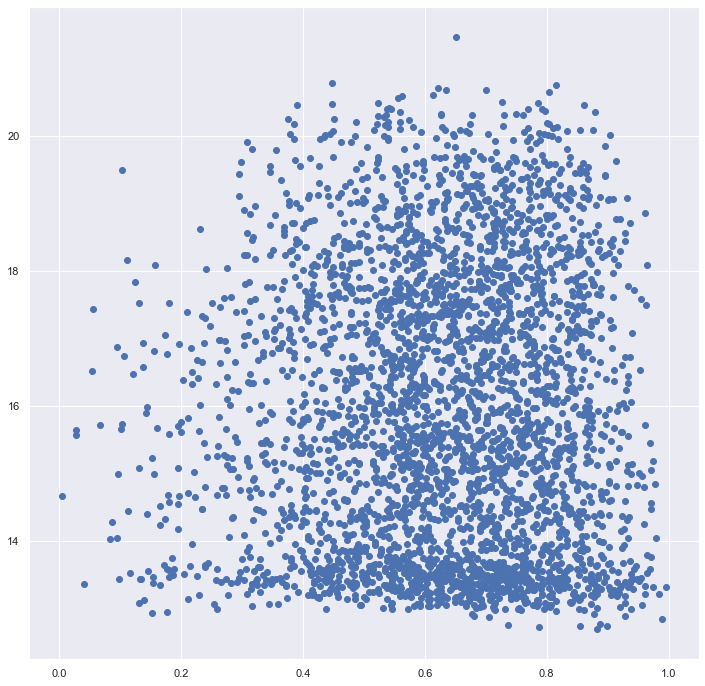

key


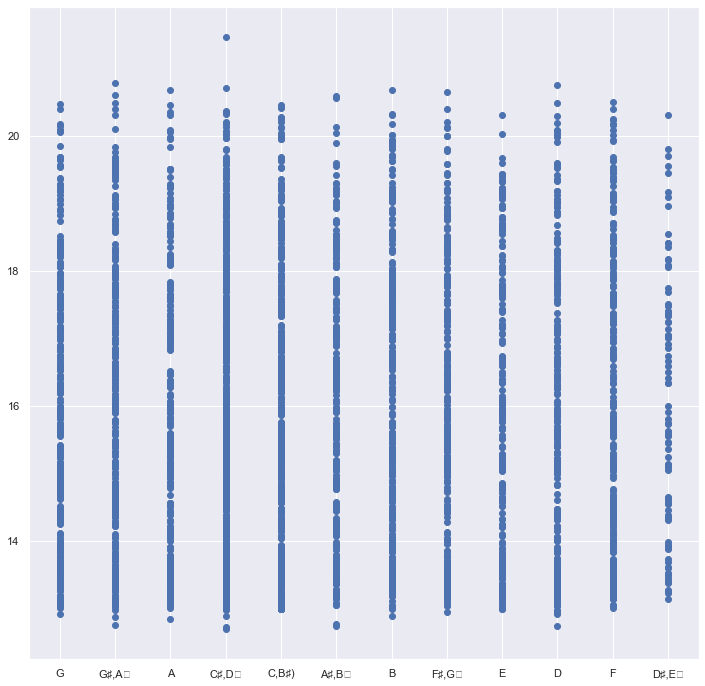

loudness


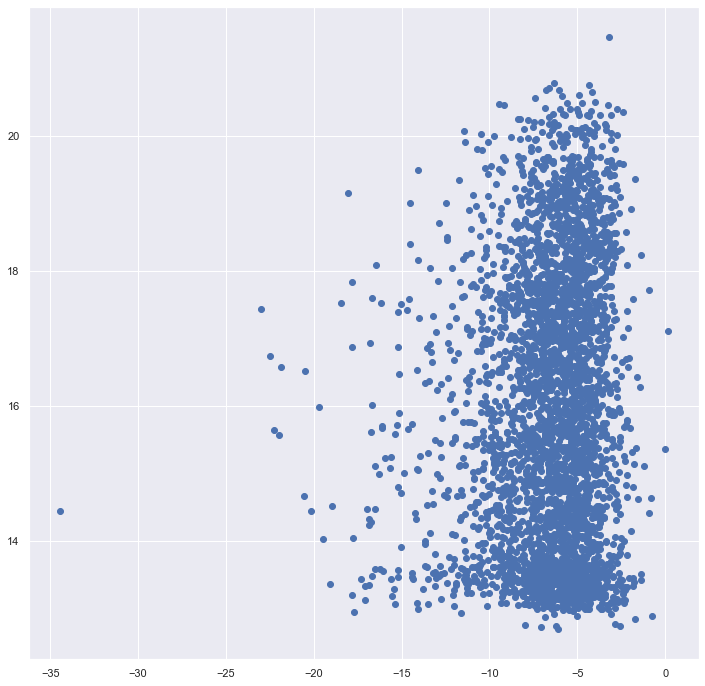

mode


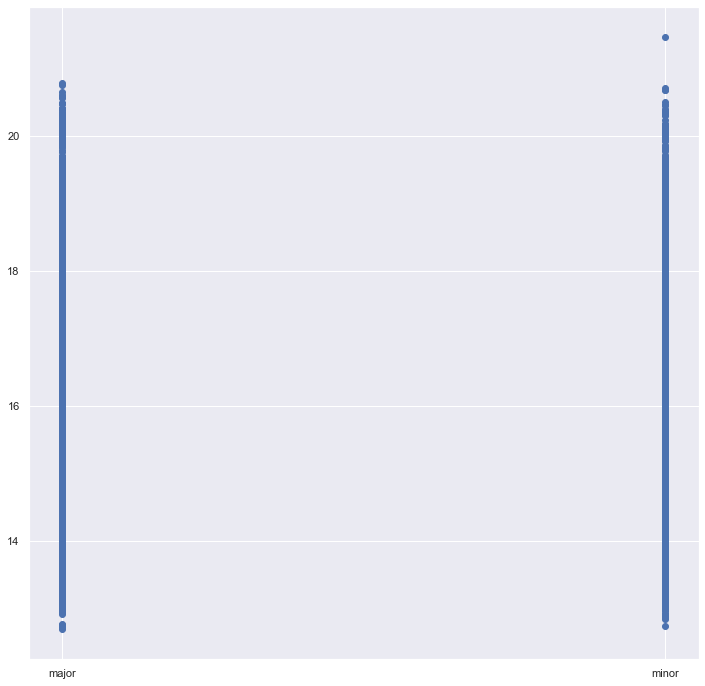

speechiness


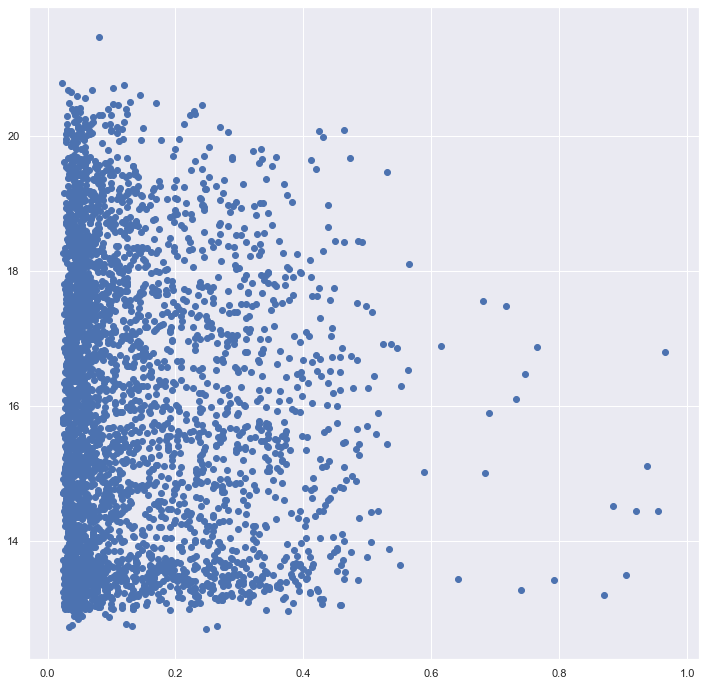

acousticness


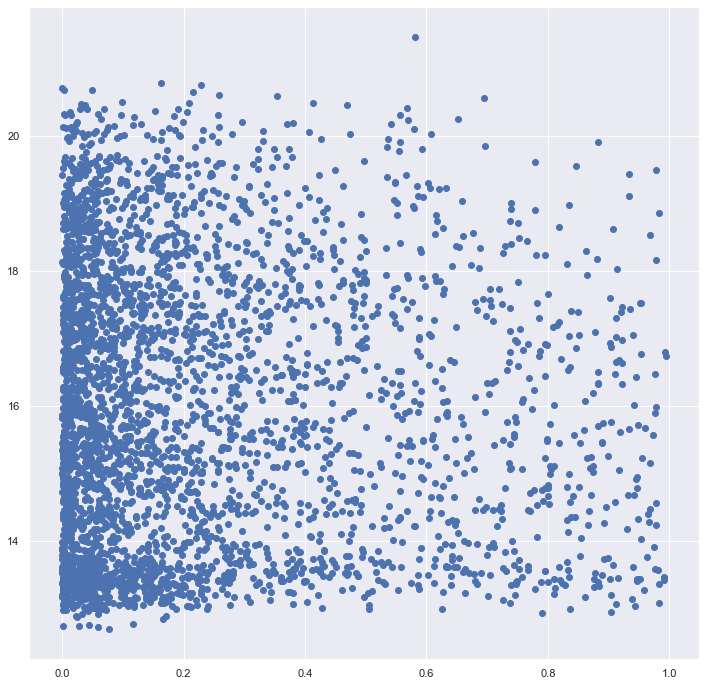

instrumentalness


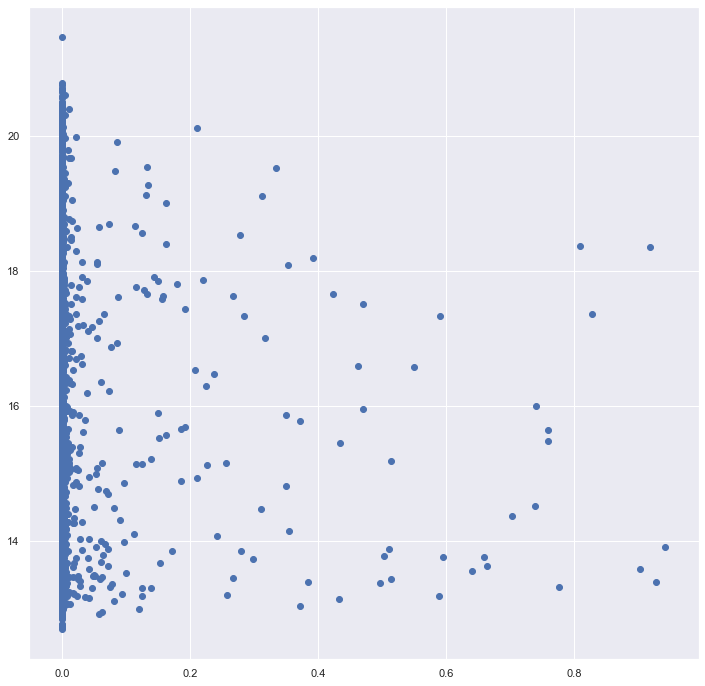

liveness


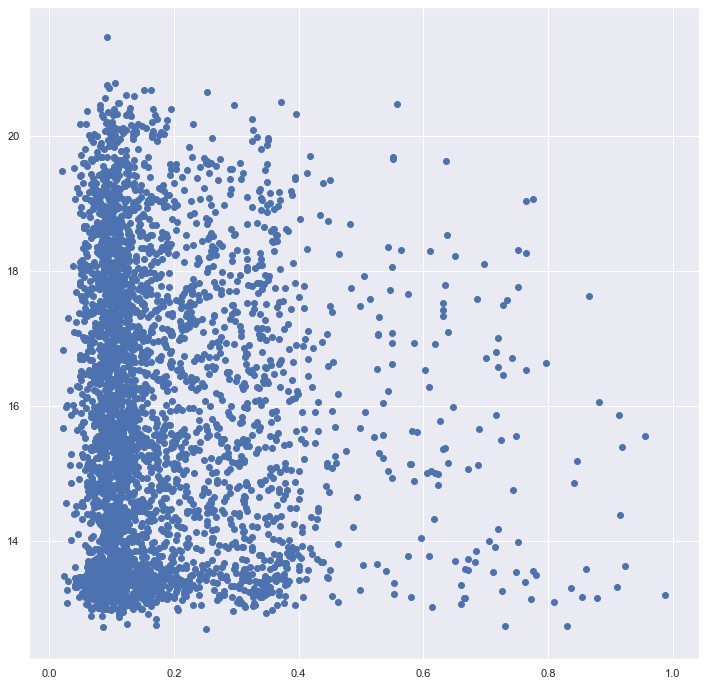

valence


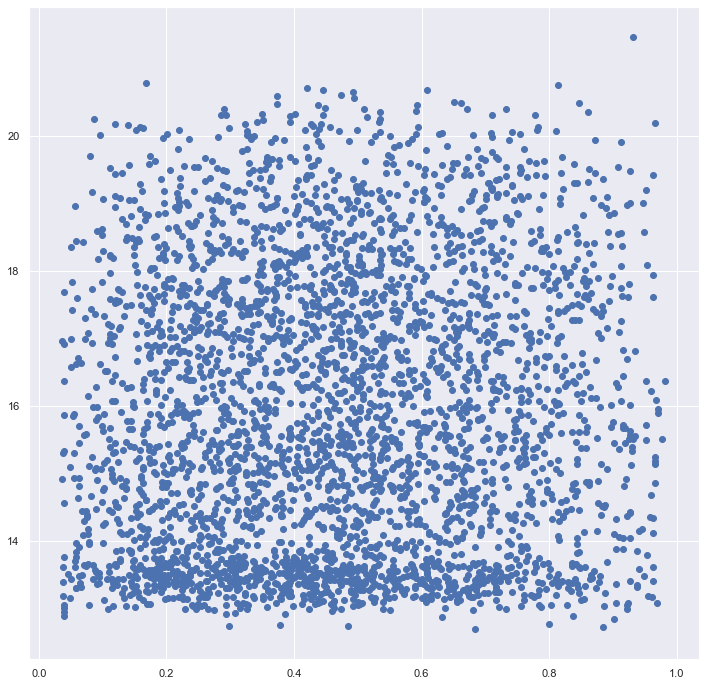

tempo


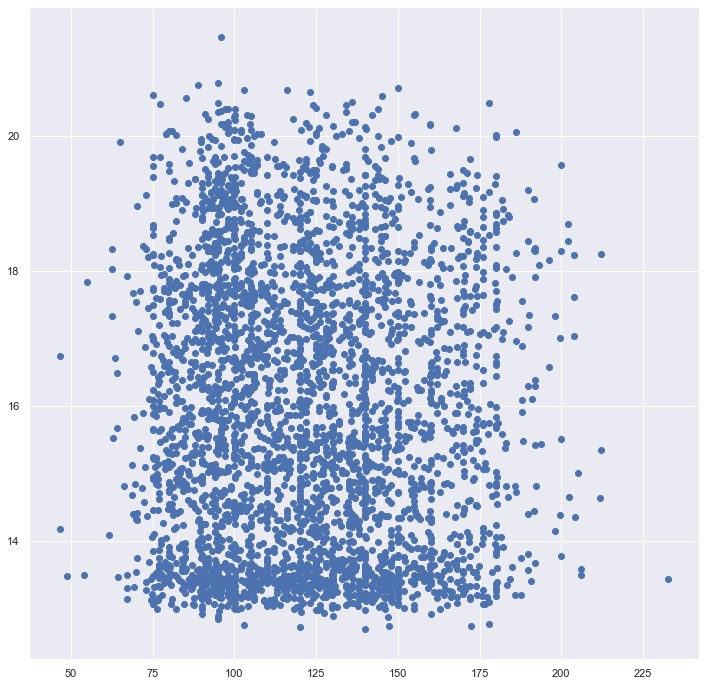

duration_ms


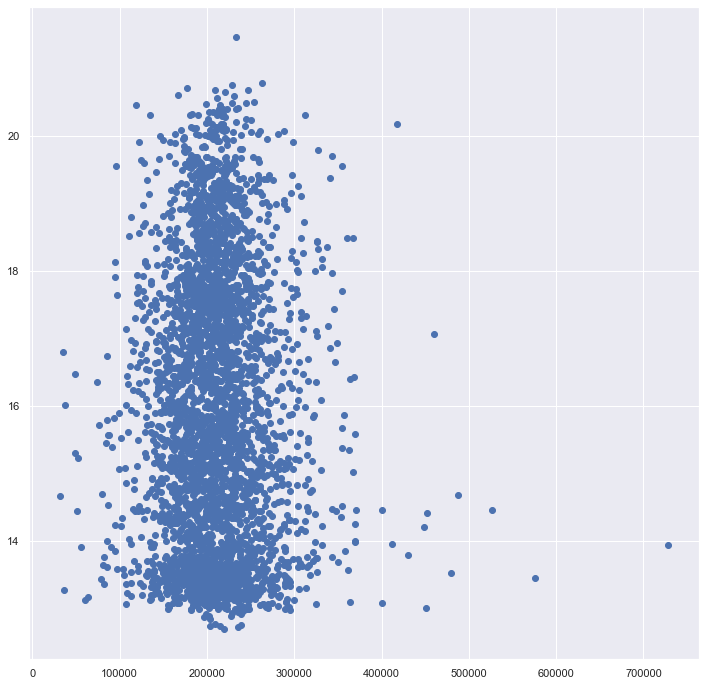

time_signature


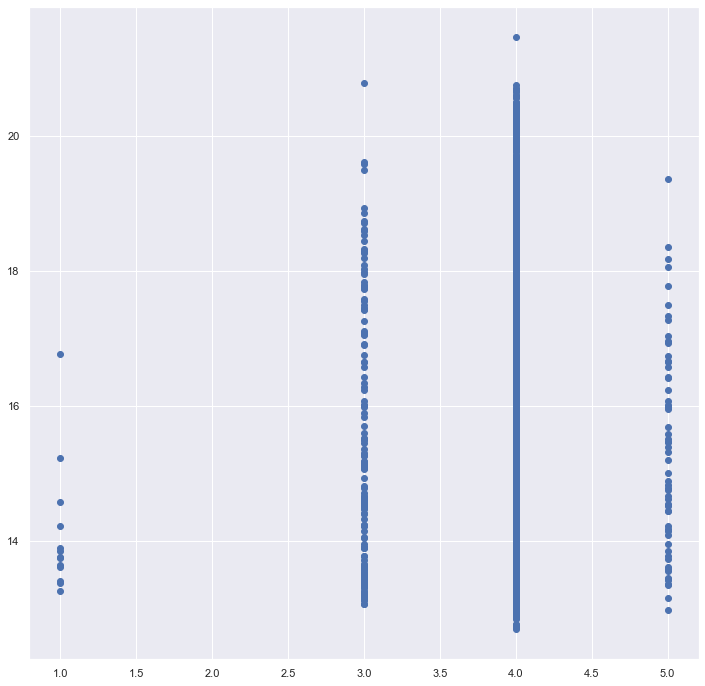

Streams


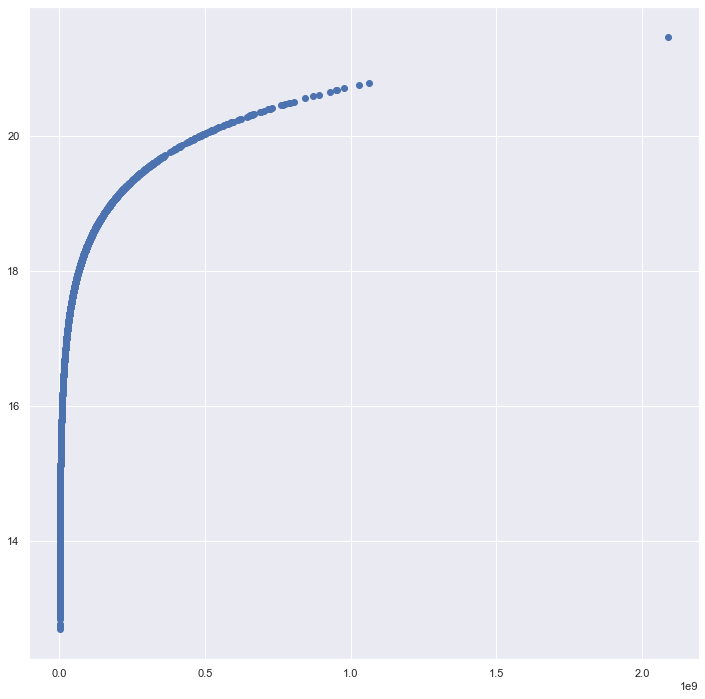

streams_log


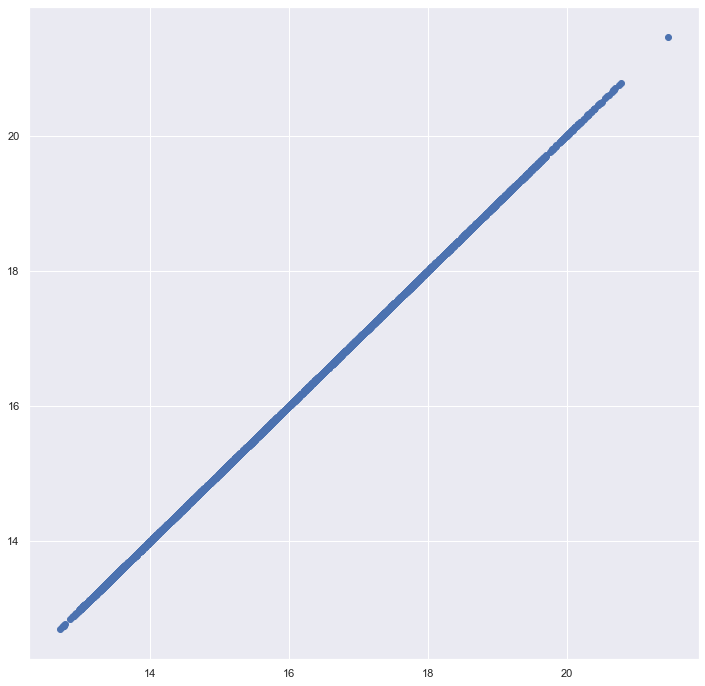

In [61]:
for num in range(len(corr_df.columns)):
    _ = plt.figure(figsize=(12,12))
    _ = plt.scatter(corr_df[corr_df.columns[num]], corr_df['streams_log'])
    print (corr_df.columns[num])
    plt.show()